### CSCN8000 –Artificial Intelligence Algorithms and Mathematics
##### Midterm Part B: Logistic Regression

##### Data Preprocessing Tasks

1. (7 points) Detect and handle outliers for all the numerical features in the dataset using either
the Whiskers Approach, or Z-score approach.

In [2]:
import pandas as pd
from scipy.stats import zscore
import numpy as np


creditcard_df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


# Copy the dataset for the Whiskers approach
whiskers_df = creditcard_df.copy()

for col in whiskers_df.columns:
    if whiskers_df[col].dtype in [np.float64, np.int64] and col != 'Class':  # Exclude 'Class'
        Q1 = whiskers_df[col].quantile(0.25)
        Q3 = whiskers_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers to boundary values
        whiskers_df[col] = np.where(whiskers_df[col] < lower_bound, lower_bound,
                                    np.where(whiskers_df[col] > upper_bound, upper_bound, whiskers_df[col]))
# Copy the dataset for the Z-score approach
zscore_df = creditcard_df.copy()
z_threshold = 3  # Set Z-score threshold

for col in zscore_df.columns:
    if zscore_df[col].dtype in [np.float64, np.int64] and col != 'Class':  # Exclude 'Class'
        # Compute Z-scores
        z_scores = zscore(zscore_df[col])
        # Replace outliers with the column mean
        col_mean = zscore_df[col].mean()
        zscore_df[col] = np.where(np.abs(z_scores) > z_threshold, col_mean, zscore_df[col])
# Summary statistics for each approach
print("Whiskers Approach Summary:\n", whiskers_df.describe())
print("\nZ-score Approach Summary:\n", zscore_df.describe())

Whiskers Approach Summary:
                 Time             V1             V2             V3  \
count  284807.000000  284807.000000  284807.000000  284807.000000   
mean    94813.859575       0.075523       0.050096       0.027167   
std     47488.145955       1.594770       1.122065       1.370364   
min         0.000000      -4.274396      -2.701961      -3.766705   
25%     54201.500000      -0.920373      -0.598550      -0.890365   
50%     84692.000000       0.018109       0.065486       0.179846   
75%    139320.500000       1.315642       0.803724       1.027196   
max    172792.000000       2.454930       2.907135       3.903536   

                  V4             V5             V6             V7  \
count  284807.000000  284807.000000  284807.000000  284807.000000   
mean       -0.027804      -0.002713      -0.090793       0.008770   
std         1.310659       1.077212       1.002595       0.865176   
min        -3.236612      -2.646882      -2.518586      -2.240844   
25%  

2. (2 points) After some analysis, if you conclude it’s needed, normalize numerical features using
appropriate method based on feature characteristics.

Skewness of Numerical Features:
 Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


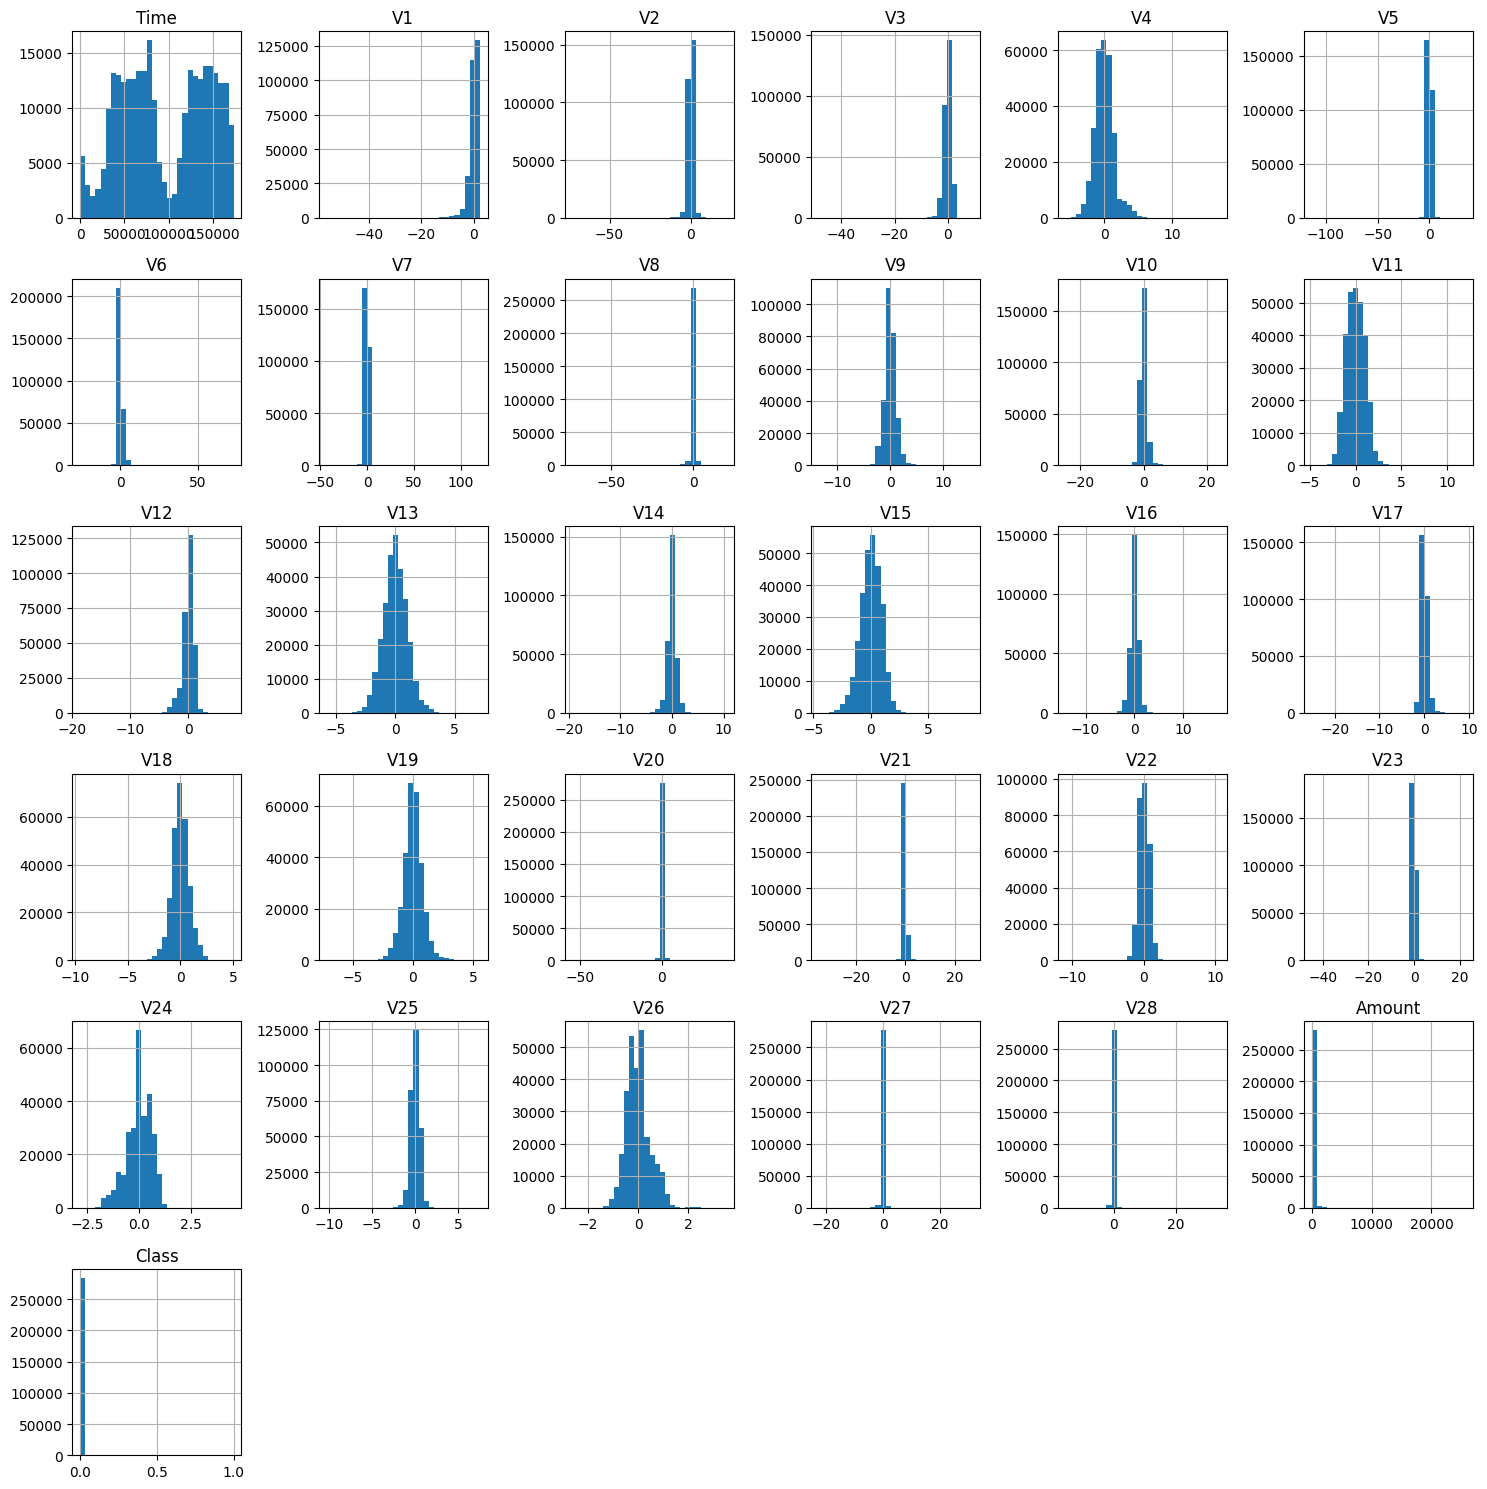

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


creditcard_df = pd.read_csv('creditcard.csv', on_bad_lines='skip')

# Calculate skewness for each numerical feature
skewness = creditcard_df.select_dtypes(include=[np.float64, np.int64]).apply(lambda x: x.skew())
print("Skewness of Numerical Features:\n", skewness)

# Plot histograms to observe distributions
num_cols = creditcard_df.select_dtypes(include=[np.float64, np.int64]).columns
creditcard_df[num_cols].hist(figsize=(15, 15), bins=30)
plt.tight_layout()
plt.show()

##### Descriptive Analytics Tasks

1. (2 points) Analyze the distribution of fraud vs non-fraud transactions and comment on it

Class Counts:
 Class
0    284315
1       492
Name: count, dtype: int64

Class Proportions:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


<ipython-input-4-c53ab6184444>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


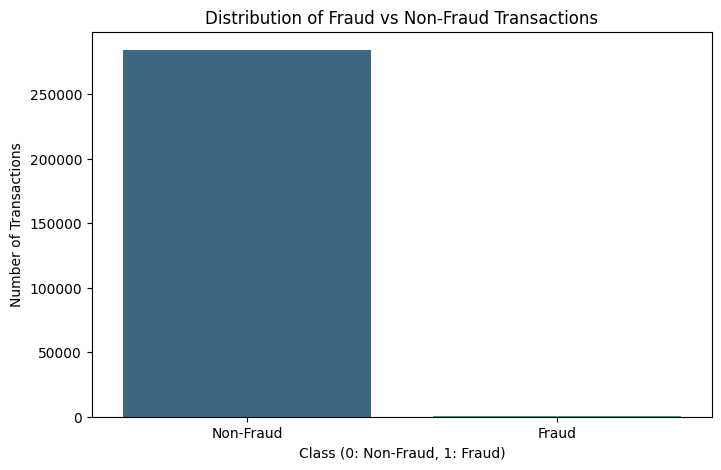

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset, handling errors with 'on_bad_lines'
creditcard_df = pd.read_csv('creditcard.csv', on_bad_lines='skip')  # Skip lines with errors

# Calculate the count and proportion of each class
class_counts = creditcard_df['Class'].value_counts()
class_proportions = creditcard_df['Class'].value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_proportions)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Number of Transactions")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

2. (4 points) Analyze the correlation between fraud/non-fraud transactions and all the other
numerical features.


Correlation of features with 'Class':
 V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


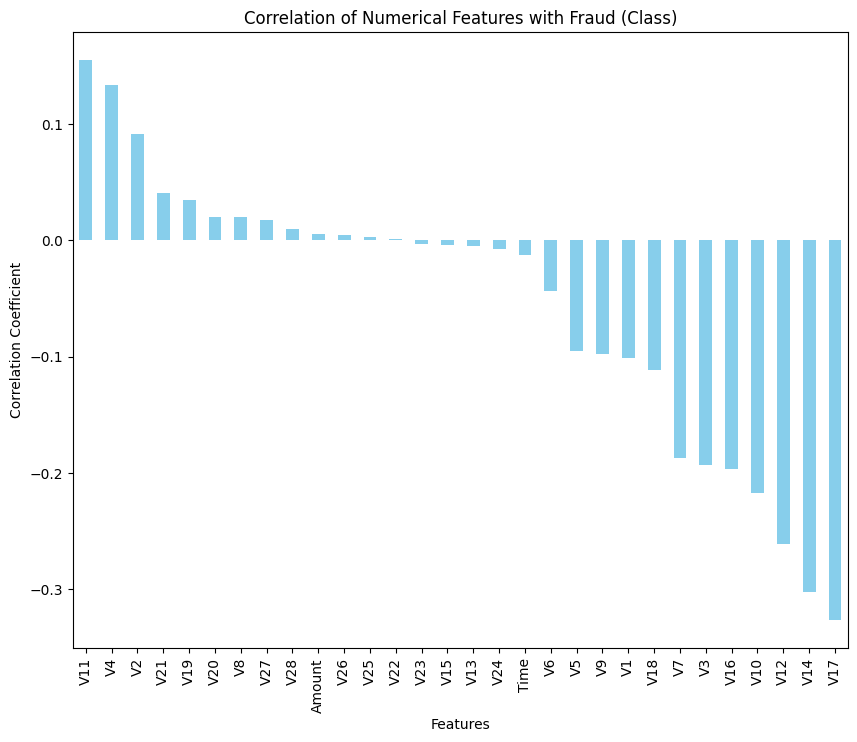

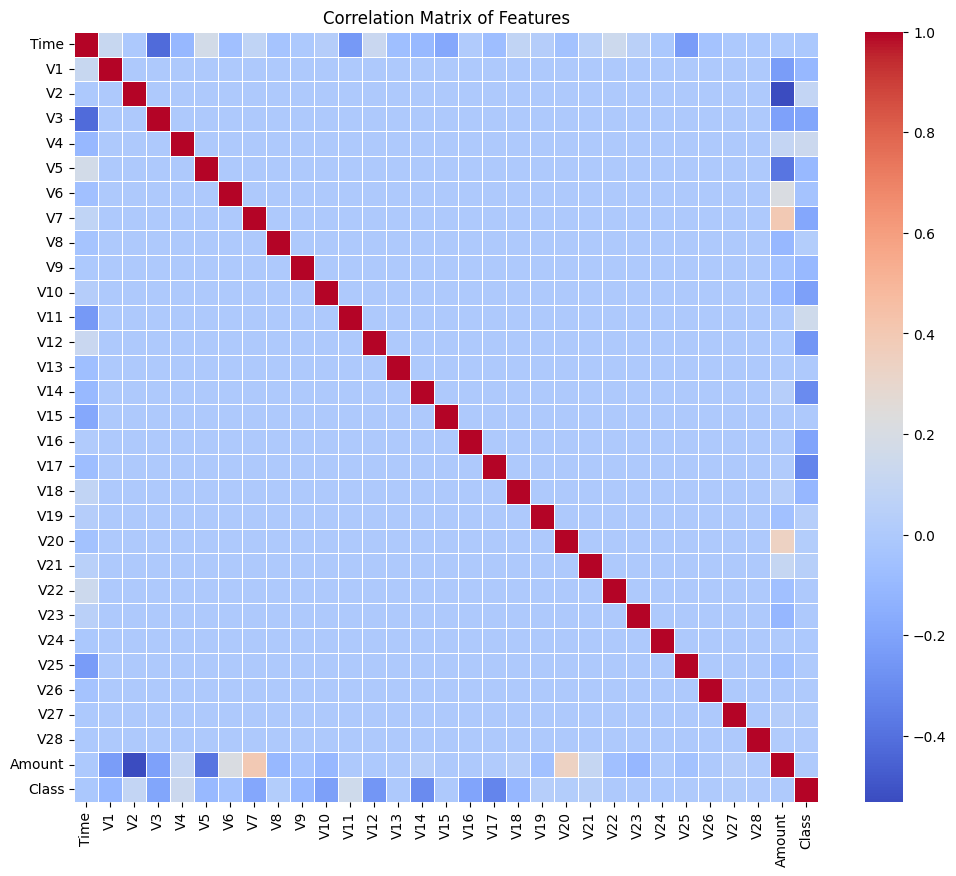

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
creditcard_df = pd.read_csv('creditcard.csv', on_bad_lines='skip')

# Convert potentially problematic columns to numeric, handling errors
# Replace 'problematic_column1', 'problematic_column2', etc. with the
# actual names of the columns causing the issue.
# If you're unsure, you can apply this to all columns except 'Class'.
for column in creditcard_df.columns:
    if column != 'Class':  # Assuming 'Class' is your target variable
        try:
            creditcard_df[column] = pd.to_numeric(creditcard_df[column], errors='coerce')
        except ValueError:
            print(f"Could not convert column '{column}' to numeric. Check its contents.")

# Calculate correlation of each feature with the target variable 'Class'
correlations = creditcard_df.corr()['Class'].drop('Class').sort_values(ascending=False)

print("Correlation of features with 'Class':\n", correlations)

# Visualize the correlation values with a bar plot
plt.figure(figsize=(10, 8))
correlations.plot(kind='bar', color='skyblue')
plt.title("Correlation of Numerical Features with Fraud (Class)")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# Optional: Heatmap for a broader correlation view
plt.figure(figsize=(12, 10))
sns.heatmap(creditcard_df.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


Comments

Top Correlated Features:The characteristics that have the strongest positive or negative associations with Class may be more suggestive of fraud. While negative correlations imply the contrary, high positive correlations indicate an increase in these characteristics is linked to fraud.
Meaning:

Strong Correlations: Even if they are only moderate, features with the greatest absolute correlation values may be helpful indicators for spotting fraud.
Impact on Model: By giving features that are more likely to be fraudulent priority during feature selection or engineering procedures, model performance may be enhanced.

3. (4 points) From the previous step, choose the 10 features with highest correlation with the
target variable, and plot their distributions against the fraud/non-fraud transactions

Top 10 Features with Highest Correlation:
 Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18'], dtype='object')


<ipython-input-6-56512856dd2b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=creditcard_df, x='Class', y=feature, palette="muted", split=True)
<ipython-input-6-56512856dd2b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=creditcard_df, x='Class', y=feature, palette="muted", split=True)
<ipython-input-6-56512856dd2b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=creditcard_df, x='Class', y=feature, palette="muted", split=True)
<ipython-input-6-56512856dd2b>:36: FutureWarning: 

Passing `palette` without assi

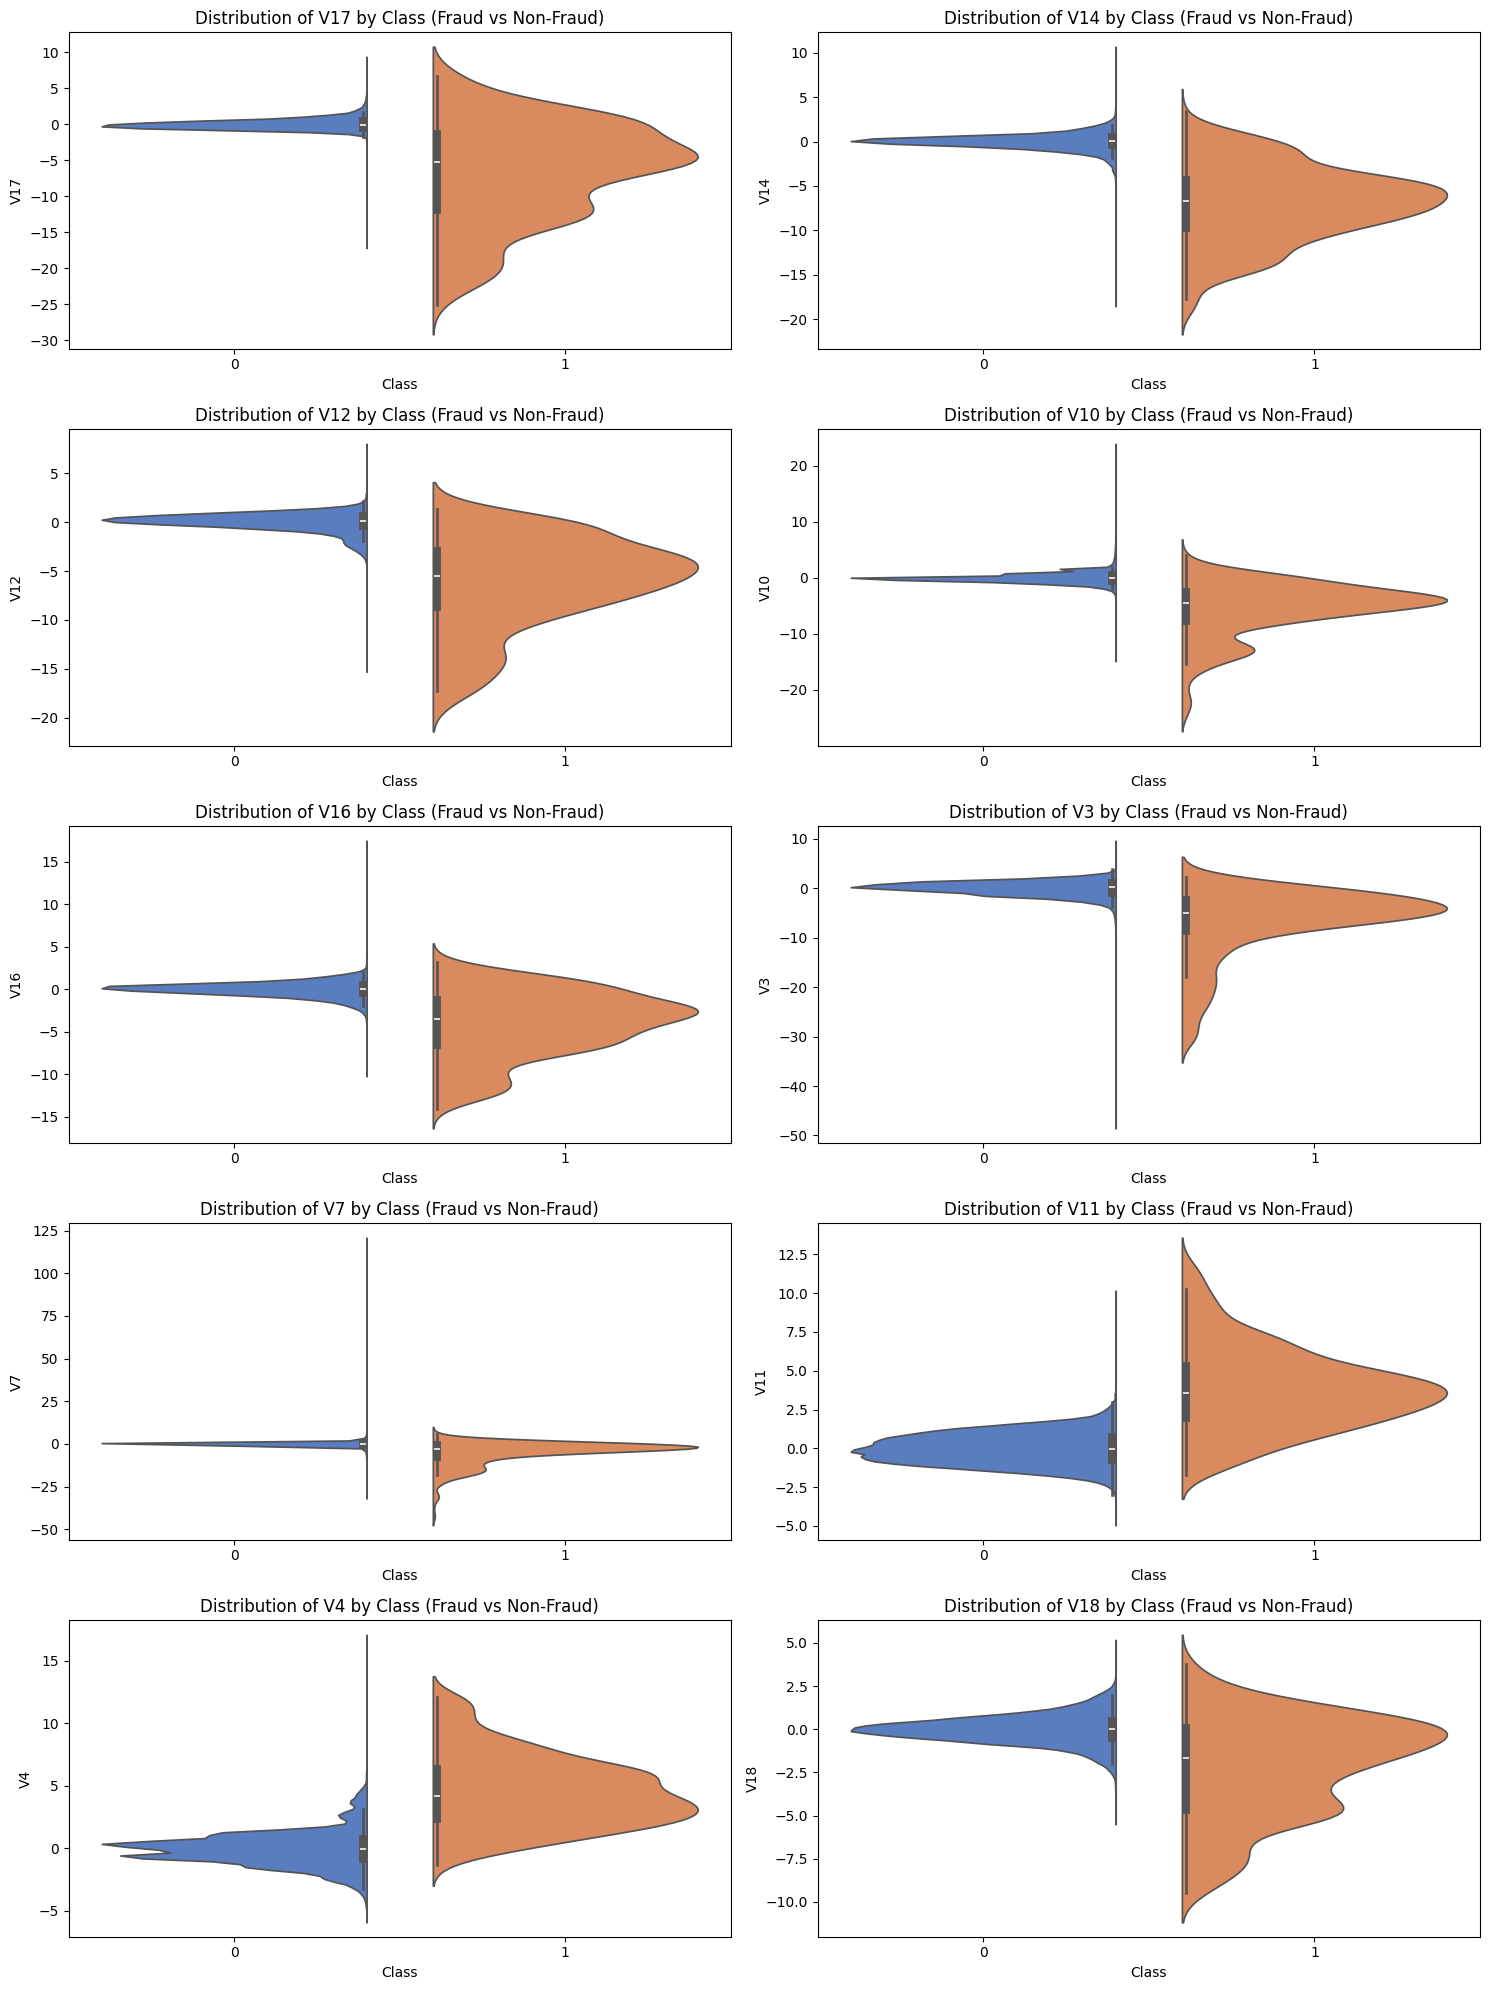

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
creditcard_df = pd.read_csv('creditcard.csv', on_bad_lines='skip')

# Iterate through columns (excluding 'Class' and 'Time' if present)
for column in creditcard_df.columns:
    if column not in ['Class', 'Time']:  # Exclude 'Class' and potentially 'Time'
        # Attempt to convert to numeric, replacing errors with NaN
        creditcard_df[column] = pd.to_numeric(creditcard_df[column], errors='coerce')

        # Check for potential string issues and try to fix them
        if creditcard_df[column].dtype == object:  # If still an object (string) type
            # Try to split and subtract if the string contains a '-'
            try:
                creditcard_df[column] = creditcard_df[column].str.split('-').apply(lambda x: float(x[0]) - float(x[1]) if len(x) == 2 else x[0])
                creditcard_df[column] = pd.to_numeric(creditcard_df[column], errors='coerce')  # Convert again
            except (ValueError, IndexError):
                print(f"Could not fix and convert column '{column}' to numeric. Check its format.")

# Calculate correlation with the target variable 'Class'
correlations = creditcard_df.corr()['Class'].drop('Class').abs().sort_values(ascending=False)

# Select the 10 features with the highest correlation with 'Class'
top_10_features = correlations.index[:10]
print("Top 10 Features with Highest Correlation:\n", top_10_features)

# ... (rest of your code remains the same)

# Plot distributions of each top feature against fraud and non-fraud transactions
plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)
    sns.violinplot(data=creditcard_df, x='Class', y=feature, palette="muted", split=True)
    plt.title(f"Distribution of {feature} by Class (Fraud vs Non-Fraud)")

plt.tight_layout()
plt.show()


##### ML Model Training and Testing Tasks

1. (2 point) Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing).

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file, specifying the delimiter and error handling
file_path = 'creditcard.csv'
creditcard_data = pd.read_csv(file_path, sep=',', on_bad_lines='skip')  # Use sep=',' if comma is your delimiter, change if needed
# on_bad_lines='skip' will skip rows with incorrect number of columns

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(creditcard_data.head())

# Assuming your target column is named 'target' (change this to your actual target column name)
# If you don't have a target column, you need to define what you're trying to predict
# For example, if the target column is 'Class' for fraud detection:
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']  # Replace 'Class' with your actual target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

2. (3 points) Use 5-fold cross-validation to train and validate the performance of all the models in
this section.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the CSV file with error handling
file_path = 'creditcard.csv'  # Path to your CSV file
creditcard_data = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

# Clean and convert the data
def clean_and_convert(column):
    column = pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    return column

for col in creditcard_data.columns:
    creditcard_data[col] = clean_and_convert(creditcard_data[col])

# Drop NaN values
creditcard_data = creditcard_data.dropna()

# Define features and target variable
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=5, scoring='f1')  # You can change scoring as needed

# Print cross-validation scores and mean score
print(f'Cross-validation F1 scores: {cv_scores}')
print(f'Mean F1 score: {np.mean(cv_scores):.4f}')


Cross-validation F1 scores: [0.71296296 0.75       0.53424658 0.67484663 0.48854962]
Mean F1 score: 0.6321


3. (3 points) Train a logistic regression model as a baseline model

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the CSV file with error handling
file_path = 'creditcard.csv'  # Path to your CSV file

# Load the data, skipping bad lines and suppressing dtype warnings
creditcard_data = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

# Display the first few rows and the data types
print(creditcard_data.head())
print(creditcard_data.dtypes)

# Function to clean and convert to numeric
def clean_and_convert(column):
    # Remove non-numeric characters and convert to numeric
    column = pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    return column

# Apply cleaning to all columns that you suspect might have mixed types
for col in creditcard_data.columns:
    creditcard_data[col] = clean_and_convert(creditcard_data[col])

# Check for any NaN values after conversion
print(creditcard_data.isna().sum())

# Optionally, drop NaN values if present
creditcard_data = creditcard_data.dropna()  # Drop rows with NaN values

# Define features and target variable
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Logistic Regression Model Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Accuracy: 0.9988
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.48      0.57        98

    accuracy                           1.00     56962
   macro avg       0.86      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962



4. (2 points) Print the learned coefficients (weights) of the model.

In [10]:
# Print the learned coefficients of the model
coefficients = logistic_model.coef_[0]  # Access the coefficients for the logistic regression model
features = X.columns  # Get the feature names

# Create a DataFrame to display features and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the coefficients by their absolute values to find the most influential features
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the sorted coefficients
print(coef_df)

# Optionally, print the feature with the highest weight
highest_weight_feature = coef_df.iloc[0]
print(f"\nFeature with the highest weight: {highest_weight_feature['Feature']} with a coefficient of {highest_weight_feature['Coefficient']:.4f}")


   Feature  Coefficient  Absolute Coefficient
13     V13    -1.441725              1.441725
15     V15    -1.314629              1.314629
14     V14     1.241573              1.241573
6       V6    -1.121338              1.121338
24     V24    -1.008968              1.008968
26     V26    -0.949526              0.949526
18     V18    -0.847764              0.847764
9       V9    -0.809553              0.809553
11     V11    -0.776707              0.776707
22     V22    -0.602376              0.602376
10     V10     0.580021              0.580021
4       V4     0.571967              0.571967
25     V25    -0.522222              0.522222
7       V7     0.521440              0.521440
21     V21     0.448909              0.448909
1       V1    -0.440920              0.440920
19     V19    -0.426269              0.426269
17     V17     0.422540              0.422540
28     V28    -0.370991              0.370991
2       V2    -0.295960              0.295960
27     V27    -0.295221           

Summary of Coefficients Interpretation
Coefficients Interpretation:

Positive Coefficients: Increase in feature leads to higher probability of the target class being positive (class 1).
Negative Coefficients: Increase in feature decreases the probability of the target class being positive.
Higher Weight:

The feature with the highest weight significantly influences model predictions, meaning changes in this feature have a notable effect on the likelihood of a positive outcome.
Understanding its importance is crucial; for example, in credit card fraud detection, larger transaction amounts might correlate with higher fraud risk.
Contextual Implications:

A heavily weighted feature raises concerns about fairness and bias. It’s important to consider how reliance on this feature affects different groups and outcomes.

5. (4 Points) Evaluate the model's performance on the test set using the following metrics:

a. Accuracy

b. Precision

c. Recall

d. F1-Score

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the CSV file with error handling
file_path = 'creditcard.csv'  # Path to your CSV file

# Load the data, skipping bad lines and suppressing dtype warnings
creditcard_data = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

# Clean and convert the data
def clean_and_convert(column):
    column = pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    return column

for col in creditcard_data.columns:
    creditcard_data[col] = clean_and_convert(creditcard_data[col])

# Drop NaN values
creditcard_data = creditcard_data.dropna()

# Define features and target variable
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Optionally, print the classification report for a detailed view
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9988
Precision: 0.7121
Recall: 0.4796
F1-Score: 0.5732

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.48      0.57        98

    accuracy                           1.00     56962
   macro avg       0.86      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962



6. (6 Points) Evaluate the performance of the logistic regression model using Log-Loss (CrossEntropy).

a. Calculate the log-loss for the logistic regression model on the test set. Do this calculation
manually using numpy only (no explicit library functions).

b. Compare the log-loss value with the other evaluation metrics (accuracy, precision, recall,
F1-Score).

c. Comment on what log-loss reveals about the model’s performance in comparison to
other metrics and how it handles misclassified probabilities.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the CSV file with error handling
file_path = 'creditcard.csv'  # Path to your CSV file
creditcard_data = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

# Clean and convert the data
def clean_and_convert(column):
    column = pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    return column

for col in creditcard_data.columns:
    creditcard_data[col] = clean_and_convert(creditcard_data[col])

# Drop NaN values
creditcard_data = creditcard_data.dropna()

# Define features and target variable
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']  # Target variable

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
y_pred = logistic_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate log-loss manually
N = len(y_test)  # Number of samples
log_loss_value = -np.sum(y_test * np.log(y_pred_proba) + (1 - y_test) * np.log(1 - y_pred_proba)) / N

# Print all metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Manually calculated Log-Loss: {log_loss_value:.4f}')


Accuracy: 0.9989
Precision: 0.7656
Recall: 0.5000
F1-Score: 0.6049
Manually calculated Log-Loss: 0.0048


In conclusion:
A crucial metric for assessing classification models is log-loss, particularly when it comes to situations where knowing how confident the model is in its predictions is crucial. It enhances conventional measures like accuracy, precision, recall, and F1-score by offering information on the caliber of projected probabilities. Log-loss penalizes misclassified probabilities based on their confidence levels, which promotes models that produce accurate forecasts with dependable certainty—a critical component of well-informed decision-making.

7. (4 Points) Plot the ROC Curve and print the AUC of the model on the test set. Comment on the
quality of the model performance as seen in the ROC curve.

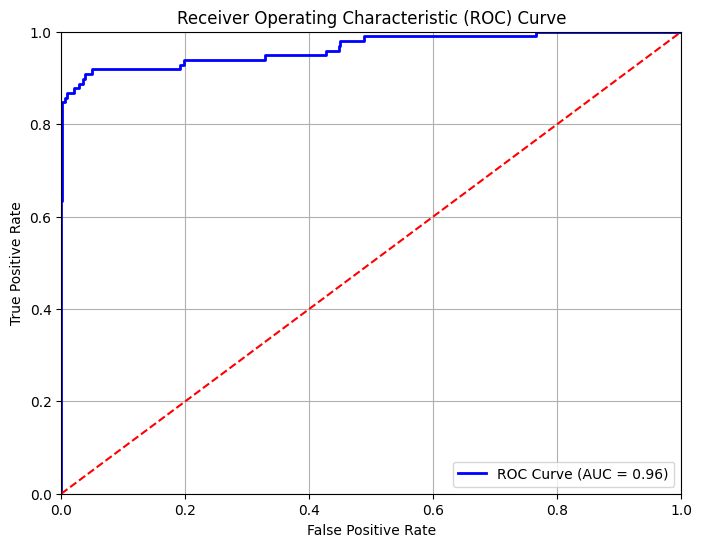

AUC: 0.9642


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the CSV file with error handling
file_path = 'creditcard.csv'  # Path to your CSV file
creditcard_data = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

# Clean and convert the data
def clean_and_convert(column):
    column = pd.to_numeric(column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    return column

for col in creditcard_data.columns:
    creditcard_data[col] = clean_and_convert(creditcard_data[col])

# Drop NaN values
creditcard_data = creditcard_data.dropna()

# Define features and target variable
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']  # Target variable

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC value
print(f'AUC: {roc_auc:.4f}')


In conclusion:
The logistic regression model's capacity to reliably categorize positive and negative classes across a range of thresholds is highlighted by the ROC curve and AUC, which offer crucial insights into the model's performance. You can gain a better understanding of your model's advantages and disadvantages by analyzing these outcomes.








8. (3 Points) Try the KNN and SVM classification compare their performance to the logistic
regression baseline.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the CSV file
file_path = 'creditcard.csv'
creditcard_data = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)

# Clean and convert the data
for col in creditcard_data.columns:
    creditcard_data[col] = pd.to_numeric(creditcard_data[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Drop NaN values
creditcard_data.dropna(inplace=True)

# Sample 10% of the data for quicker testing
creditcard_data = creditcard_data.sample(frac=0.1, random_state=42)

# Define features and target variable
X = creditcard_data.drop('Class', axis=1)  # Replace 'Class' with your actual target column name
y = creditcard_data['Class']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (Baseline)
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# KNN Classifier with a smaller value of k
knn_model = KNeighborsClassifier(n_neighbors=3)  # Try with 3 neighbors
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# SVM Classifier without probability estimates
svm_model = SVC()  # Remove probability=True for faster training
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, logistic_model.predict_proba(X_test_scaled)[:, 1])

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")

# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "KNN")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")


Logistic Regression Metrics:
Accuracy: 0.9984
Precision: 0.2857
Recall: 0.3333
F1-Score: 0.3077
AUC: 0.8087

KNN Metrics:
Accuracy: 0.9988
Precision: 0.4000
Recall: 0.3333
F1-Score: 0.3636
AUC: 0.8087

SVM Metrics:
Accuracy: 0.9989
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.8087



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
